C:\Users\User\AppData\Local\Temp\ipykernel_20908\1552287290.py:118: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


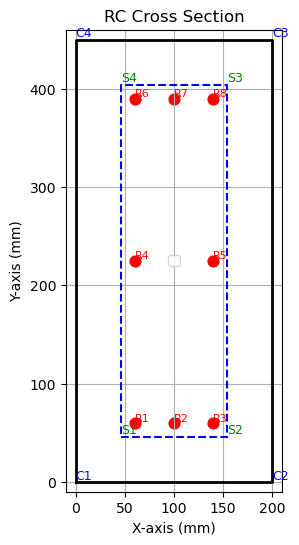

{'section_corners': [(0.0, 0.0), (200, 0.0), (200, 450), (0.0, 450)],
 'stirrup_corners': [(46.0, 46.0),
  (154.0, 46.0),
  (154.0, 404.0),
  (46.0, 404.0)],
 'rebar_coords': [(60.0, 60.0),
  (100.0, 60.0),
  (140.0, 60.0),
  (60.0, 225.0),
  (140.0, 225.0),
  (60.0, 390.0),
  (100.0, 390.0),
  (140.0, 390.0)],
 'total_no_rsb': 8}

In [20]:
import matplotlib.pyplot as plt

def compute_and_plot_beam_rebar(width, height, cover, ds, db, nx, ny, plot=True):
    """
    1) Compute rebar layout.
    2) Plot cross-section with rebar layout.
    3) Return results dictionary.
    """

    # -----------------------------------------------------------
    # 1) Outer rectangle corners (unconfined section)
    # -----------------------------------------------------------
    section_corners = [
        (0.0,  0.0),       
        (width,  0.0),       
        (width,  height),    
        (0.0,  height)
    ]

    # -----------------------------------------------------------
    # 2) Stirrup center-line corners (confined section)
    #    Offset from the outer face by (cover + 0.5*ds)
    # -----------------------------------------------------------
    stirrup_offset = cover + 0.5 * ds
    stirrup_corners = [
        (stirrup_offset,             stirrup_offset),
        (width - stirrup_offset,     stirrup_offset),
        (width - stirrup_offset,     height - stirrup_offset),
        (stirrup_offset,             height - stirrup_offset)
    ]

    # -----------------------------------------------------------
    # 3) Main bar offset from the outer face
    #    = cover + ds + 0.5*db
    # -----------------------------------------------------------
    rebar_offset = cover + ds + 0.5 * db

    x_left  = rebar_offset
    x_right = width - rebar_offset
    y_bot   = rebar_offset
    y_top   = height - rebar_offset

    # -----------------------------------------------------------
    # 4) Compute rebar coordinates
    # -----------------------------------------------------------
    rebar_coords = []

    # Horizontal bars (top & bottom)
    if nx == 1:
        x_positions = [(x_left + x_right) / 2.0]
    else:
        dx = (x_right - x_left) / (nx - 1)
        x_positions = [x_left + i * dx for i in range(nx)]

    for x_pos in x_positions:
        rebar_coords.append((x_pos, y_bot))  # bottom
        rebar_coords.append((x_pos, y_top))  # top

    # Vertical bars (left & right)
    if ny == 1:
        y_positions = [(y_bot + y_top) / 2.0]
    else:
        dy = (y_top - y_bot) / (ny - 1)
        y_positions = [y_bot + i * dy for i in range(ny)]

    for y_pos in y_positions:
        rebar_coords.append((x_left,  y_pos))   # left
        rebar_coords.append((x_right, y_pos))   # right

    # Remove duplicates (corner bars appear in both sets)
    rebar_coords = list(set(rebar_coords))
    # Sort in ascending order of y, then x for consistent output
    rebar_coords.sort(key=lambda pt: (pt[1], pt[0]))

    # -----------------------------------------------------------
    # 5) Count total number of bars
    # -----------------------------------------------------------
    total_no_rsb = len(rebar_coords)

    # -----------------------------------------------------------
    # 6) Plot the layout
    # -----------------------------------------------------------
    fig, ax = plt.subplots(figsize=(5, 6))

    # Outer rectangle (unconfined section)
    x_vals = [p[0] for p in section_corners] + [section_corners[0][0]]
    y_vals = [p[1] for p in section_corners] + [section_corners[0][1]]
    ax.plot(x_vals, y_vals, 'k-', linewidth=2) # label="Unconfined Section"

    # Stirrup center-line rectangle
    sx_vals = [p[0] for p in stirrup_corners] + [stirrup_corners[0][0]]
    sy_vals = [p[1] for p in stirrup_corners] + [stirrup_corners[0][1]]
    ax.plot(sx_vals, sy_vals, 'b--', linewidth=1.5) #label="Stirrup (Center-Line)"

    # Rebar points
    rx = [p[0] for p in rebar_coords]
    ry = [p[1] for p in rebar_coords]
    ax.scatter(rx, ry, s=60, c='red', marker='o') #Main Bars"

    # if show_labels:
        # Label corners
    for i, pt in enumerate(section_corners, start=1):
        ax.text(pt[0], pt[1], f"C{i}", color='blue', fontsize=9, ha='left', va='bottom')
        # Label stirrup corners
    for i, pt in enumerate(stirrup_corners, start=1):
        ax.text(pt[0], pt[1], f"S{i}", color='green', fontsize=9, ha='left', va='bottom')
        # Label rebar
    for i, (xr, yr) in enumerate(rebar_coords, start=1):
        ax.text(xr, yr, f"R{i}", color='red', fontsize=8, ha='left', va='bottom')

    # Formatting
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-10, width + 10)
    ax.set_ylim(-10, height + 10)
    ax.set_xlabel("X-axis (mm)")
    ax.set_ylabel("Y-axis (mm)")
    ax.set_title("RC Cross Section")
    ax.legend()
    ax.grid(plot)

    plt.show()

    # -----------------------------------------------------------
    # 7) Return dictionary with everything
    # -----------------------------------------------------------
    return {
        "section_corners":  section_corners,
        "stirrup_corners":  stirrup_corners,
        "rebar_coords":     rebar_coords,
        "total_no_rsb":     total_no_rsb
    }

compute_and_plot_beam_rebar(200, 450, 40, 12, 16, 3, 3)

Unconfined (outer) rectangle corners:
  C1 = (0.0, 0.0)
  C2 = (200, 0.0)
  C3 = (200, 600)
  C4 = (0.0, 600)

Confined (inner) rectangle corners (center-line):
  S1 = (45.0, 45.0)
  S2 = (155.0, 45.0)
  S3 = (155.0, 555.0)
  S4 = (45.0, 555.0)

Rebar coordinates:
  R1 = (58.0, 58.0)
  R2 = (142.0, 58.0)
  R3 = (58.0, 219.33333333333334)
  R4 = (142.0, 219.33333333333334)
  R5 = (58.0, 380.6666666666667)
  R6 = (142.0, 380.6666666666667)
  R7 = (58.0, 542.0)
  R8 = (142.0, 542.0)

Calculated steel ratio: 0.0148 (bars: 8)


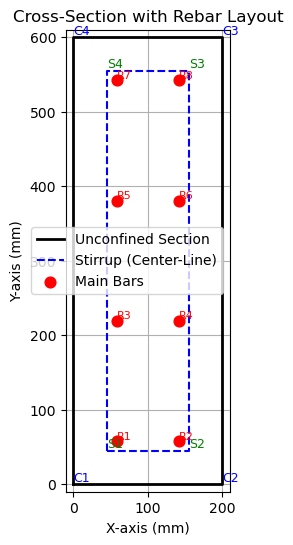

In [ ]:


def compute_rebar_coordinates(width, height, cover, ds, db, nx, ny):
    
    """
    Parameters:
    width    # Section width  [mm]
    height   # Section height [mm]
    cover    # Concrete cover (to stirrup outer face) [mm]
    ds       # Diameter of stirrups   [mm]
    d        # Diameter of main bars  [mm]
    nx       # Number of bars along top & bottom
    ny       # Number of bars along left & right
    
    Returns:
    'section_corners': 4 points (x, y) for the OUTER rectangle (unconfined section)
    'stirrup_corners': 4 points (x, y) for the STIRRUP CENTER-LINE rectangle
    'rebar_coords':    (x, y) locations for each main rebar
    """

    # -----------------------------------------------------------
    # 1) Outer rectangle corners (unconfined section)
    # -----------------------------------------------------------
    section_corners = [
        (0.0,  0.0),       # bottom-left
        (width,  0.0),       # bottom-right
        (width,  height),    # top-right
        (0.0,  height)       # top-left
    ]

    # -----------------------------------------------------------
    # 2) Stirrup center-line corners (confined section)
    #    Offset from the outer face by (cover + 0.5*ds)
    # -----------------------------------------------------------
    stirrup_offset = cover + 0.5 * ds
    stirrup_corners = [
        (stirrup_offset,              stirrup_offset),
        (width - stirrup_offset,      stirrup_offset),
        (width - stirrup_offset,      height - stirrup_offset),
        (stirrup_offset,              height - stirrup_offset)
    ]

    # -----------------------------------------------------------
    # 3) Main bar offset from the outer face
    #    = cover + ds + 0.5*db
    # -----------------------------------------------------------
    rebar_offset = cover + ds + 0.5 * db

    x_left  = rebar_offset
    x_right = width - rebar_offset
    y_bot   = rebar_offset
    y_top   = height - rebar_offset

    # -----------------------------------------------------------
    # 4) Compute rebar coordinates
    # -----------------------------------------------------------
    rebar_coords = []

    # Horizontal bars (top & bottom)
    if nx == 1:
        x_positions = [(x_left + x_right) / 2.0]
    else:
        dx = (x_right - x_left) / (nx - 1)
        x_positions = [x_left + i * dx for i in range(nx)]

    for x_pos in x_positions:
        rebar_coords.append((x_pos, y_bot))  # bottom
        rebar_coords.append((x_pos, y_top))  # top

    # Vertical bars (left & right)
    if ny == 1:
        y_positions = [(y_bot + y_top) / 2.0]
    else:
        dy = (y_top - y_bot) / (ny - 1)
        y_positions = [y_bot + i * dy for i in range(ny)]

    for y_pos in y_positions:
        rebar_coords.append((x_left,  y_pos))   # left
        rebar_coords.append((x_right, y_pos))   # right

    # Remove duplicates (corner bars appear in both sets)
    rebar_coords = list(set(rebar_coords))
    rebar_coords.sort(key=lambda pt: (pt[1], pt[0]))

    total_reinforcment = 0 #

    return {
        "section_corners":  section_corners,
        "stirrup_corners":  stirrup_corners,
        "rebar_coords":     rebar_coords
    }

def steelratio(width, depth, db, rebar_coords):
    """
    ρ = total steel area / (width * height)
    where total steel area = number_of_bars * (pi * (db^2) / 4).

    If ρ > 0.03 (i.e., 3%), the function returns 0.03 and the required number of bars
    needed to achieve exactly a 3% steel ratio. Otherwise, it returns the calculated ρ
    and the actual number of bars.
    
    Parameters:
    width       -- Section width [mm]
    depth       -- Section effective depth [mm]
    db          -- Diameter of main bars [mm]
    rebar_coords-- List of (x, y) coordinates for each main rebar
    
    Returns:
    A tuple (rho, bars) where:
      - rho is the effective steel ratio (capped at 3% if necessary)
      - bars is either the actual number of bars (if within limit) or the required number
        of bars to achieve a 3% steel ratio.
    """
    rebar_count = len(rebar_coords)
    bar_area = math.pi * math.pow(db/2, 2)
    total_steel_area = rebar_count * bar_area
    rho = total_steel_area / (width * depth)
    max_rho = 0.03
    if rho > max_rho:
        required_steel_area = max_rho * (width * depth)  # corrected: use depth instead of height
        required_bars = math.ceil(required_steel_area / bar_area)
        results = max_rho, required_bars 
    else:
        results = rho, rebar_count
    return results

def plot_beam_rebar(width, height, section_corners, stirrup_corners, rebar_coords, show_labels=True):

    fig, ax = plt.subplots(figsize=(5, 6))

    # --- 1) Outer rectangle (unconfined section) ---
    x_vals = [p[0] for p in section_corners] + [section_corners[0][0]]
    y_vals = [p[1] for p in section_corners] + [section_corners[0][1]]
    ax.plot(x_vals, y_vals, 'k-', linewidth=2, label="Unconfined Section")

    # --- 2) Stirrup center-line rectangle ---
    sx_vals = [p[0] for p in stirrup_corners] + [stirrup_corners[0][0]]
    sy_vals = [p[1] for p in stirrup_corners] + [stirrup_corners[0][1]]
    ax.plot(sx_vals, sy_vals, 'b--', linewidth=1.5, label="Stirrup (Center-Line)")

    # --- 3) Rebar points ---
    rx = [p[0] for p in rebar_coords]
    ry = [p[1] for p in rebar_coords]
    ax.scatter(rx, ry, s=60, c='red', marker='o', label="Main Bars")

    # --- 4) Labels ---
    if show_labels:
        for i, pt in enumerate(section_corners, start=1):
            ax.text(pt[0], pt[1], f"C{i}", color='blue', fontsize=9, ha='left', va='bottom')

        for i, pt in enumerate(stirrup_corners, start=1):
            ax.text(pt[0], pt[1], f"S{i}", color='green', fontsize=9, ha='left', va='bottom')

        for i, (xr, yr) in enumerate(rebar_coords, start=1):
            ax.text(xr, yr, f"R{i}", color='red', fontsize=8, ha='left', va='bottom')

    # --- 5) Formatting ---
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-10, width + 10)
    ax.set_ylim(-10, height + 10)
    ax.set_xlabel("X-axis (mm)")
    ax.set_ylabel("Y-axis (mm)")
    ax.set_title("Cross-Section with Rebar Layout")
    ax.legend()
    ax.grid(True)

    plt.show()


if __name__ == "__main__":
    # Parameters:
    width   = 200   # mm
    height  = 600    # mm
    cover   = 40.0     # mm  (measured to stirrup outer face)
    ds      = 10.0      # mm  (stirrup diameter)
    db      = 16.0     # mm  (main bar diameter)
    depth  = height - cover - ds - db/2
    nx      = 2        # bars along top/bottom
    ny      = 4        # bars along left/right

    # Compute the coordinates
    results = compute_rebar_coordinates(width, height, cover, ds, db, nx, ny)

    section_corners  = results["section_corners"]
    stirrup_corners  = results["stirrup_corners"]
    rebar_coords     = results["rebar_coords"]

    # Print results
    print("Unconfined (outer) rectangle corners:")
    for i, corner in enumerate(section_corners, start=1):
        print(f"  C{i} = {corner}")

    print("\nConfined (inner) rectangle corners (center-line):")
    for i, corner in enumerate(stirrup_corners, start=1):
        print(f"  S{i} = {corner}")

    print("\nRebar coordinates:")
    for i, coord in enumerate(rebar_coords, start=1):
        print(f"  R{i} = {coord}")

    # Print steel ratio
    rho, bars = steelratio(width, depth, db, rebar_coords)

    print(f"\nCalculated steel ratio: {rho:.4f} (bars: {bars})")

    # Plot the section
    plot_beam_rebar(width, height, section_corners, stirrup_corners, rebar_coords, show_labels=True)